** K Means Clustering Algorithm **
K-means is a popular clustering algorithm that partitions a dataset into K clusters based on their similarity. It is a relatively simple algorithm that works well for many applications. Let us aim to implement K-Means on the breast cancer classification task. 

Step 1: Import the modules

We need to perform Exploratory Data Analysis on our dataset. Let us begin by importing the models necessary for the task.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score

Step 2: Load the Dataset

In [ ]:
# Load the breast cancer dataset
df = pd.read_csv('breast_cancer_data.csv')
# Print the first few rows of the dataframe
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

Step 3: Perform EDA
Let us attempt to get a rough understanding of the data.

In [ ]:
# Get summary statistics for the dataframe
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

Let us check for missing values in the dataset.

In [ ]:
# Check for missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Let us map the values of the target variable to Boolean numbers. 

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


Let us fill the NaN values with the mean of the record data.

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imputed = imputer.fit_transform(df)


Let us aim to plot the correlation matrix. Correlation matrices are useful for identifying relationships between variables in a dataset, which can help in understanding the underlying patterns and structure of the data. 

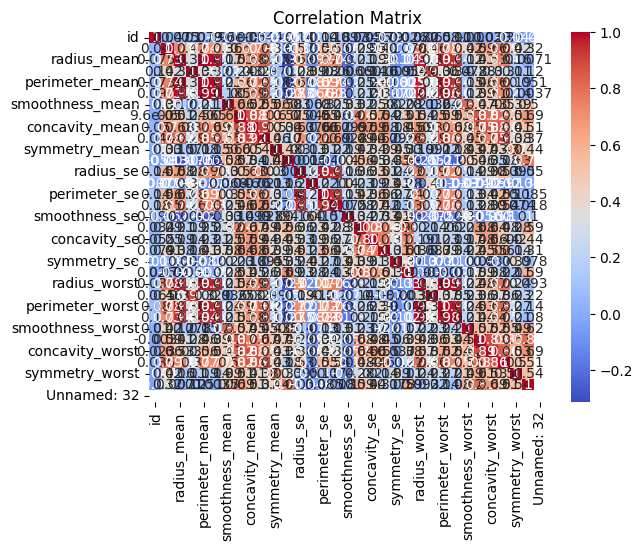

In [ ]:
# Plot the correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

High positive correlation (close to 1.0) indicates that the two variables tend to increase or decrease together, while high negative correlation (close to -1.0) indicates that one variable tends to increase when the other decreases. A correlation close to zero indicates no linear relationship between the two variables.

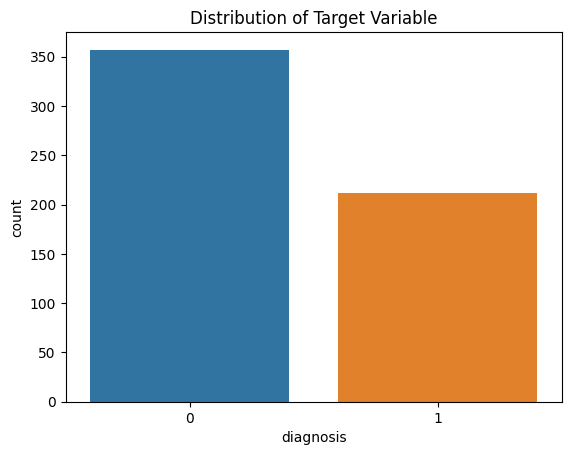

In [ ]:
# Plot the distribution of the target variable
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Target Variable')
plt.show()

A majority of tumours are benign.

Let us find out the dataset features and plot the distribution.

In [ ]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


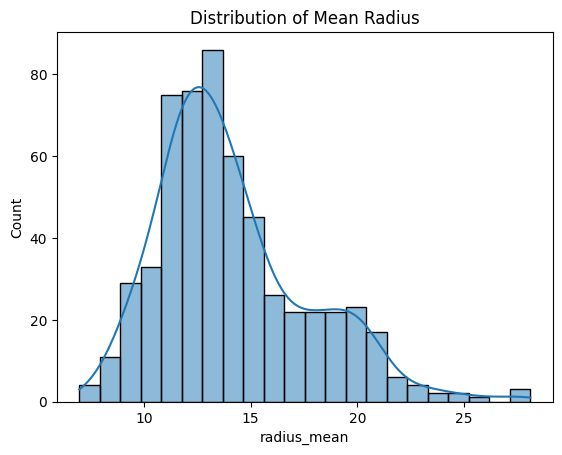

In [ ]:
# Plot the distribution of Mean Radius
# We can plot the distribution of any feature of the output list printed by the above Code Cell
sns.histplot(df['radius_mean'], kde=True)
plt.title('Distribution of Mean Radius')
plt.show()

From the graph, we can figure out the most and least common mean radius.

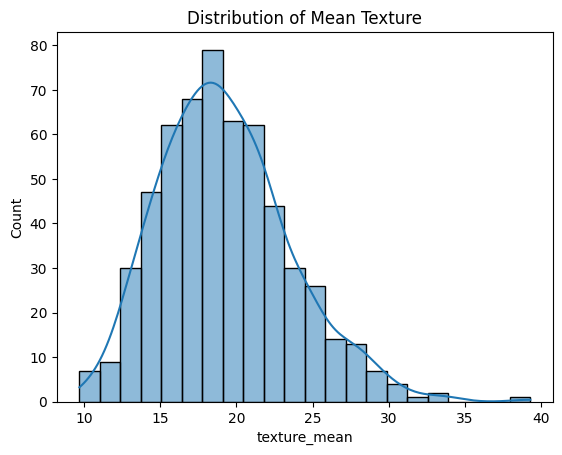

In [ ]:
sns.histplot(df['texture_mean'], kde=True)
plt.title('Distribution of Mean Texture')
plt.show()

Now that EDA is done, let us train the model.

Step 4: Train the model

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_imputed)

# Print the cluster labels
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

c:\Users\Sahithi Rao\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The output of kmeans.labels_ is a 1-dimensional array that contains the cluster labels assigned to each of the samples in the input dataset.

Let us measure the performance of the algorithm by finding 

1. The silhouette score:
 The silhouette score ranges from -1 to 1, where a score of 1 indicates that the clusters are well-separated, while a score of -1 indicates that the samples have been assigned to the wrong cluster. A score close to 0 indicates that the clusters are overlapping.

 2. Calinski-Harabasz Score: The Calinski-Harabasz score is a single number that reflects the quality of the clustering, with higher values indicating better clustering performance.

In [ ]:
silhouette_avg = silhouette_score(data_imputed, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)
ch_score = calinski_harabasz_score(data_imputed, kmeans.labels_)
print("Calinski-Harabasz score:", ch_score)

The average silhouette_score is : 0.9753276628229629
Calinski-Harabasz score: 10344.154673193761


Inference: Our model has performed well.